In [41]:
# I confirm that I did not use codes from anyone else and that the work I submit is my own and my own only

-0.09973321725850402


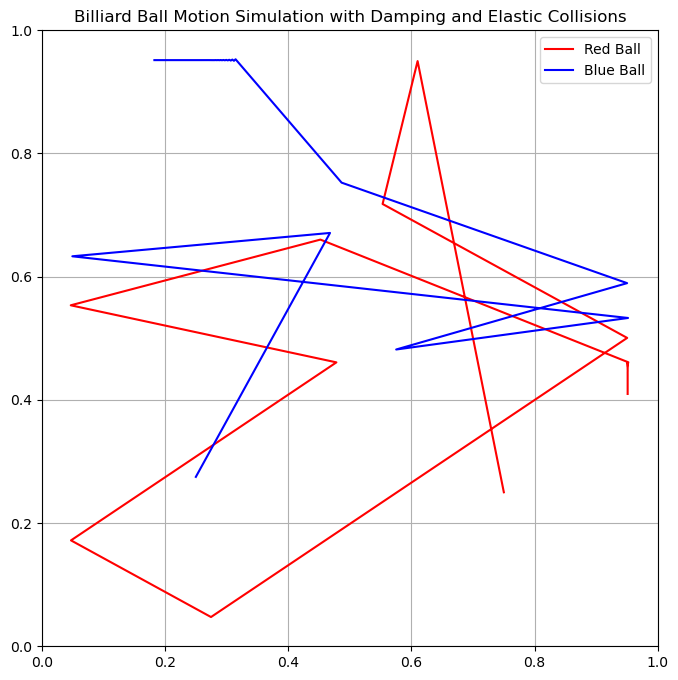

In [42]:
import numpy as np
import matplotlib.pyplot as plt

redBall = np.array([0.75, .25])  # Red ball initial position (.5 * .05 is .25)
blueBall = np.array([0.25, .275])  # Blue ball initial position (5.5 * .05 is .275)
redVelocity = np.array([-0.1, 0.5])  # Red ball initial velocity
blueVelocity = np.array([0.11, 0.2])  # Blue ball initial velocity

table_dims = [0, 1]

r = 0.05 # ball radius
alpha = 0.8 # alpha factor
beta = 0.98 # beta factor

# Simulation parameters
dt = 0.02        
t_final = 50

# Store positions for plotting
red_positions = [redBall.copy()]
blue_positions = [blueBall.copy()]

time = 0

while time < t_final:
    # euler integration (new_pos = current_pos + velocity * (delta t) )
    redBall += redVelocity * dt
    blueBall += blueVelocity * dt

    # wall collisions for red ball
    if redBall[0] - r < table_dims[0] or redBall[0] + r > table_dims[1]: # left or right walls
        redVelocity[0] *= -alpha # Reverse because if the ball hits a wall, it now goes the other way and then apply damping
        redVelocity[1] *= beta  # tangential (perpendicular vector) damping
    if redBall[1] - r < table_dims[0] or redBall[1] + r > table_dims[1]: # top or bottom walls
        redVelocity[1] *= -alpha  # Reverse because if the ball hits a wall, it now goes the other way and then apply damping
        redVelocity[0] *= beta  # tangential (perpendicular vector) damping

    # wall collisions for blue ball
    if blueBall[0] - r < table_dims[0] or blueBall[0] + r > table_dims[1]: # left or right walls
        blueVelocity[0] *= -alpha  # Reverse because if the ball hits a wall, it now goes the other way and then apply damping
        blueVelocity[1] *= beta  # tangential (perpendicular vector) damping
    if blueBall[1] - r < table_dims[0] or blueBall[1] + r > table_dims[1]: # top or bottom walls
        blueVelocity[1] *= -alpha # Reverse because if the ball hits a wall, it now goes the other way and then apply damping
        blueVelocity[0] *= beta  # tangential (perpendicular vector) damping

    # distance between the balls indicates whether or not the balls collide
    distance = np.linalg.norm(redBall - blueBall)
    if distance < 2 * r:  # if balls are overlapping
        # computes normal and tangential vectors
        normal = (redBall - blueBall) / distance
        
        # calculate the normal components of velocity (dot product with normal)
        red_normal_velocity = np.dot(redVelocity, normal)
        blue_normal_velocity = np.dot(blueVelocity, normal)
        
        # exchange normal velocities
        redVelocity = redVelocity - red_normal_velocity * normal + blue_normal_velocity * normal
        blueVelocity = blueVelocity - blue_normal_velocity * normal + red_normal_velocity * normal


    # I need to store all the different ball positions for the plot
    red_positions.append(redBall.copy())
    blue_positions.append(blueBall.copy())

    time += dt
print(red_normal_velocity)

red_positions = np.array(red_positions)
blue_positions = np.array(blue_positions)

plt.figure(figsize=(8, 8))
plt.plot(red_positions[:, 0], red_positions[:, 1], 'r-', label='Red Ball')
plt.plot(blue_positions[:, 0], blue_positions[:, 1], 'b-', label='Blue Ball')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Billiard Ball Motion Simulation with Damping and Elastic Collisions')
plt.legend()
plt.grid(True)
plt.show()